In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sports-classification/EfficientNetB0-100-(224 X 224)- 98.40.h5
/kaggle/input/sports-classification/sports.csv
/kaggle/input/sports-classification/valid/bobsled/5.jpg
/kaggle/input/sports-classification/valid/bobsled/1.jpg
/kaggle/input/sports-classification/valid/bobsled/4.jpg
/kaggle/input/sports-classification/valid/bobsled/3.jpg
/kaggle/input/sports-classification/valid/bobsled/2.jpg
/kaggle/input/sports-classification/valid/hurdles/5.jpg
/kaggle/input/sports-classification/valid/hurdles/1.jpg
/kaggle/input/sports-classification/valid/hurdles/4.jpg
/kaggle/input/sports-classification/valid/hurdles/3.jpg
/kaggle/input/sports-classification/valid/hurdles/2.jpg
/kaggle/input/sports-classification/valid/snow boarding/5.jpg
/kaggle/input/sports-classification/valid/snow boarding/1.jpg
/kaggle/input/sports-classification/valid/snow boarding/4.jpg
/kaggle/input/sports-classification/valid/snow boarding/3.jpg
/kaggle/input/sports-classification/valid/snow boarding/2.jpg
/kaggl

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/sports-classification/sports.csv')
df.head()

,class id,filepaths,labels,data set
0,0,train/air hockey/001.jpg,air hockey,train
1,0,train/air hockey/002.jpg,air hockey,train
2,0,train/air hockey/003.jpg,air hockey,train
3,0,train/air hockey/004.jpg,air hockey,train
4,0,train/air hockey/005.jpg,air hockey,train


In [5]:
df.columns

Index(['class id', 'filepaths', 'labels', 'data set'], dtype='object')

In [6]:
# Fix filepaths (convert to full paths)
base_dir = '/kaggle/input/sports-classification'
df['filepaths'] = df['filepaths'].apply(lambda x: os.path.join(base_dir, x))

In [7]:
import cv2
import numpy as np

def extract_features(img_path):
    if not os.path.exists(img_path):
        print(f"File not found: {img_path}")
        return np.zeros(512)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Unreadable image: {img_path}")
        return np.zeros(512)
    img = cv2.resize(img, (64, 64))
    hist = cv2.calcHist([img], [0, 1, 2], None, [8,8,8], [0,256, 0,256, 0,256])
    return hist.flatten()

In [8]:
features = [extract_features(path) for path in df['filepaths']]
X = np.array(features)
y = df['labels'].values

Unreadable image: /kaggle/input/sports-classification/train/high jump/159.lnk


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [11]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

                       precision    recall  f1-score   support

           air hockey       0.55      0.21      0.30        29
      ampute football       0.27      0.25      0.26        24
              archery       0.25      0.04      0.06        28
        arm wrestling       0.35      0.25      0.29        24
         axe throwing       0.17      0.15      0.16        27
         balance beam       0.40      0.47      0.43        30
        barell racing       0.11      0.11      0.11        28
             baseball       0.30      0.36      0.33        36
           basketball       0.14      0.37      0.20        30
       baton twirling       0.57      0.16      0.25        25
            bike polo       0.23      0.28      0.25        25
            billiards       0.41      0.59      0.48        34
                  bmx       0.20      0.07      0.10        30
              bobsled       0.16      0.11      0.13        35
              bowling       0.00      0.00      0.00  

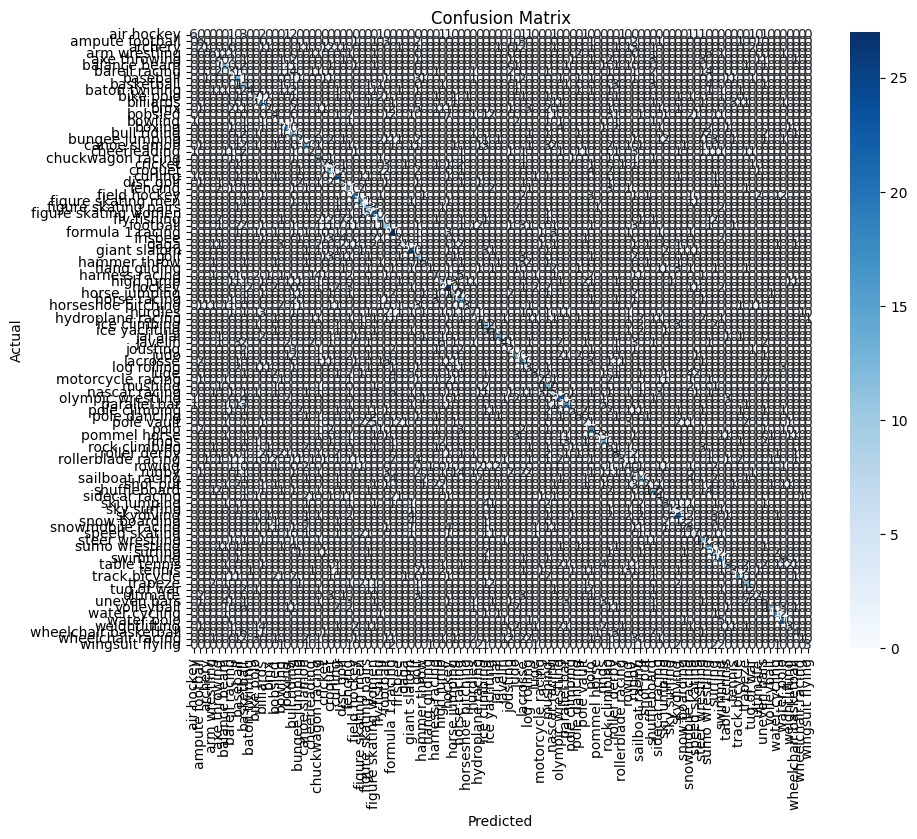

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y), cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()